In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
print(os.listdir("../data"))

['mal_url_dataset.csv', 'mal_url_dataset_1.csv', 'urldata.csv', 'urldata1.csv']


In [3]:
urldata = pd.read_csv("../data/urldata1.csv")

In [4]:
urldata.head()

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0


In [5]:
#removing unnamed column
urldata = urldata.drop('Unnamed: 0',axis=1)

In [6]:
urldata

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0
...,...,...,...
100171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1
100172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1
100173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1
100174,http://atualizapj.com/,malicious,1


In [7]:
urldata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100176 entries, 0 to 100175
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     100176 non-null  object
 1   label   100176 non-null  object
 2   result  100176 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


In [8]:
#checking for missing values
urldata.isnull().sum()

url       0
label     0
result    0
dtype: int64

In [9]:
from urllib.parse import urlparse

In [10]:
from tld import get_tld

In [11]:
#length of url
urldata['url_length'] = urldata['url'].apply(lambda i: len(str(i)))

In [12]:
urldata['hostname_length'] = urldata['url'].apply(lambda i: len(urlparse(i).netloc))

In [13]:
#Length of Top Level Domain
urldata['tld'] = urldata['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return 0

urldata['tld_length'] = urldata['tld'].apply(lambda i: tld_length(i) if i != 0 else i)

In [14]:
urldata['path_length'] = urldata['url'].apply(lambda i: len(urlparse(i).path))

In [15]:
urldata['count@'] = urldata['url'].apply(lambda i: i.count('@'))
urldata['count.'] = urldata['url'].apply(lambda i: i.count('.'))
urldata['count-http'] = urldata['url'].apply(lambda i : i.count('http'))


In [16]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
urldata['count-digits']= urldata['url'].apply(lambda i: digit_count(i))

In [17]:
def url_has_port_in_string(url):
    has_port = urlparse(url).netloc.split(':')
    return len(has_port) > 1 and has_port[-1].isdigit()
urldata['url_has_port_in_string'] = urldata['url'].apply(lambda i: url_has_port_in_string(i))

In [18]:
import re
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return -1
    else:
        return 1
urldata['short_url'] = urldata['url'].apply(lambda i: shortening_service(i))

In [19]:
# from requests import get
# def get_html(url):
#     try:
#         html = get(url, timeout=5)
#         html = html.text if html else None
#     except:
#         html = None
#     return html

# def number_of_whitespace(url):
#     html=get_html(url)
#     if html!=None:
# #         whitespaces = [i for i in get_html(url) if i == ' ']
#         whitespaces=0
#         for i in html:
#             if i==' ':
#                 whitespaces+=1
#         return whitespaces
#     return -1
# urldata['number_of_whitespace'] = urldata['url'].apply(lambda i: number_of_whitespace(i))
# print(urldata['number_of_whitespace'])

In [20]:
urldata.head()

,url,label,result,url_length,hostname_length,tld,tld_length,path_length,count@,count.,count-http,count-digits,url_has_port_in_string,short_url
0,https://www.google.com,benign,0,22,14,com,3,0,0,2,1,0,False,1
1,https://www.youtube.com,benign,0,23,15,com,3,0,0,2,1,0,False,1
2,https://www.facebook.com,benign,0,24,16,com,3,0,0,2,1,0,False,1
3,https://www.baidu.com,benign,0,21,13,com,3,0,0,2,1,0,False,1
4,https://www.wikipedia.org,benign,0,25,17,org,3,0,0,2,1,0,False,1


Text(0, 0.5, 'Number Of URLs')

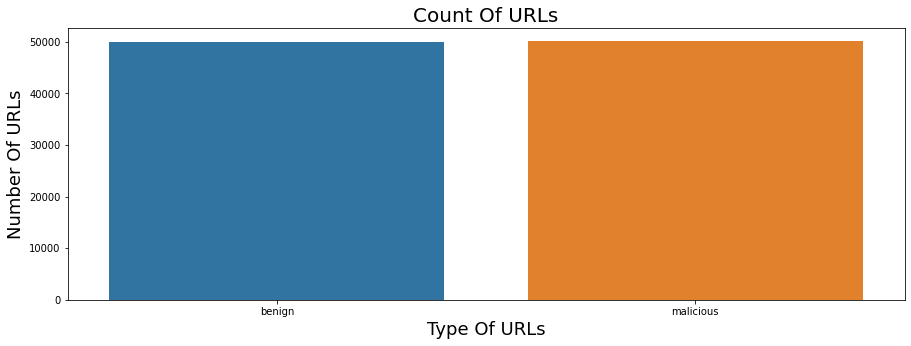

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=urldata)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

In [22]:
print(f"Percent Of Malicious URLs:{round(len(urldata[urldata['label']=='malicious'])/len(urldata['label'])*100, 2)} %")
print(f"Percent Of Benign URLs:{round(len(urldata[urldata['label']=='benign'])/len(urldata['label'])*100, 2)} %")

Percent Of Malicious URLs:50.09 %
Percent Of Benign URLs:49.91 %


(150.0, 230.0)

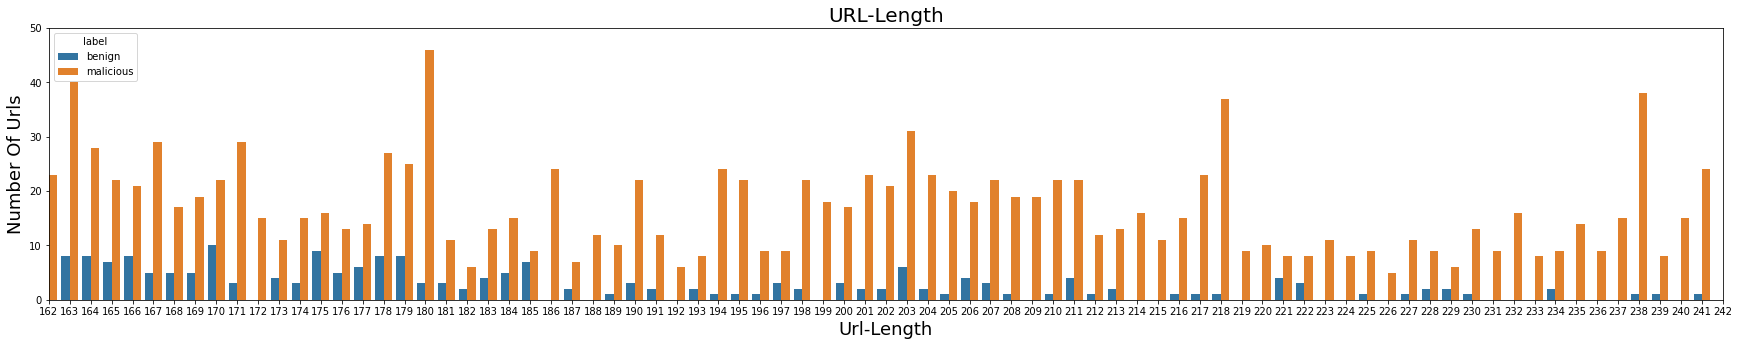

In [45]:
plt.figure(figsize=(30,5))
# sns.histplot(data= urldata, x='url_length', hue='label', multiple='stack')
sns.countplot(x='url_length', data=urldata,hue='label')
plt.title("URL-Length",fontsize=20)
plt.xlabel("Url-Length",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,50)
plt.xlim(150,230)

(0.0, 80.0)

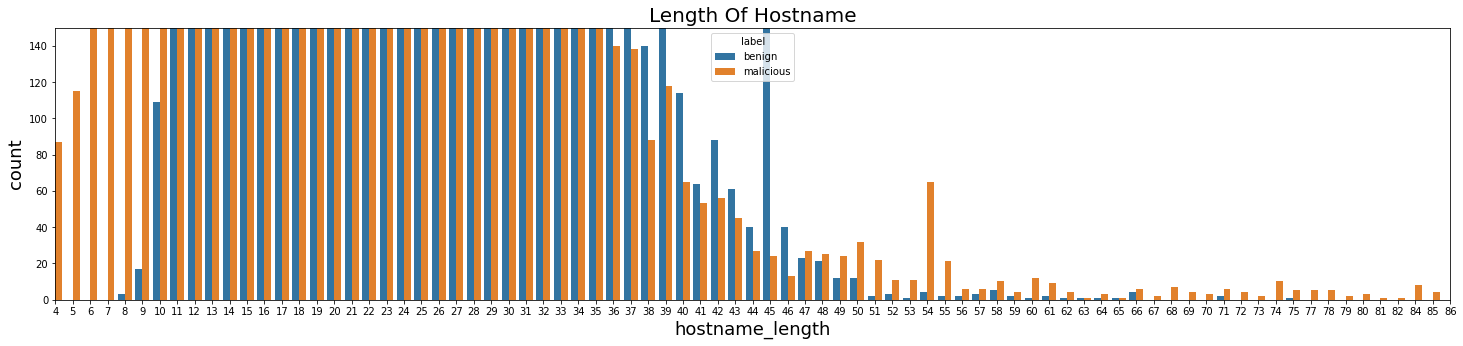

In [46]:
plt.figure(figsize=(25,5))
plt.title("Length Of Hostname",fontsize=20)
plt.xlabel("Length Of Hostname",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)
sns.countplot(x='hostname_length',data=urldata,hue='label')
plt.ylim(0,150)
plt.xlim(0,80)

(0.0, 100.0)

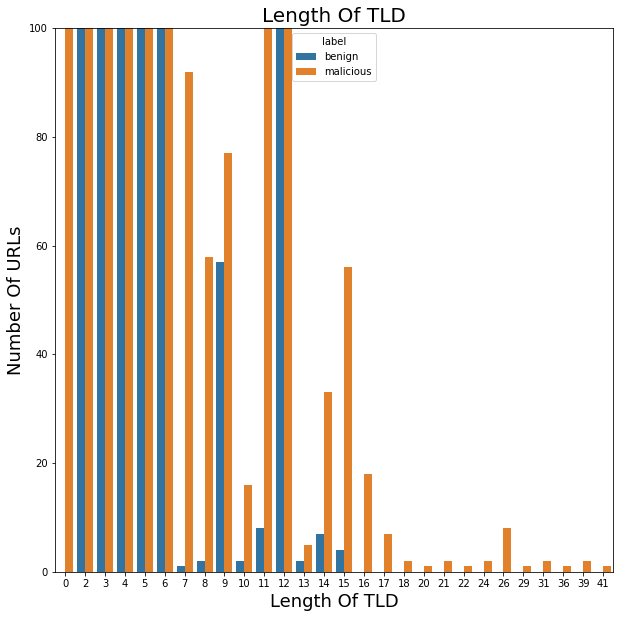

In [25]:
plt.figure(figsize=(10,10))
plt.title("Length Of TLD",fontsize=20)
sns.countplot(x='tld_length',data=urldata,hue='label')
plt.xlabel("Length Of TLD",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)
plt.ylim(0,100)

(0.0, 180.0)

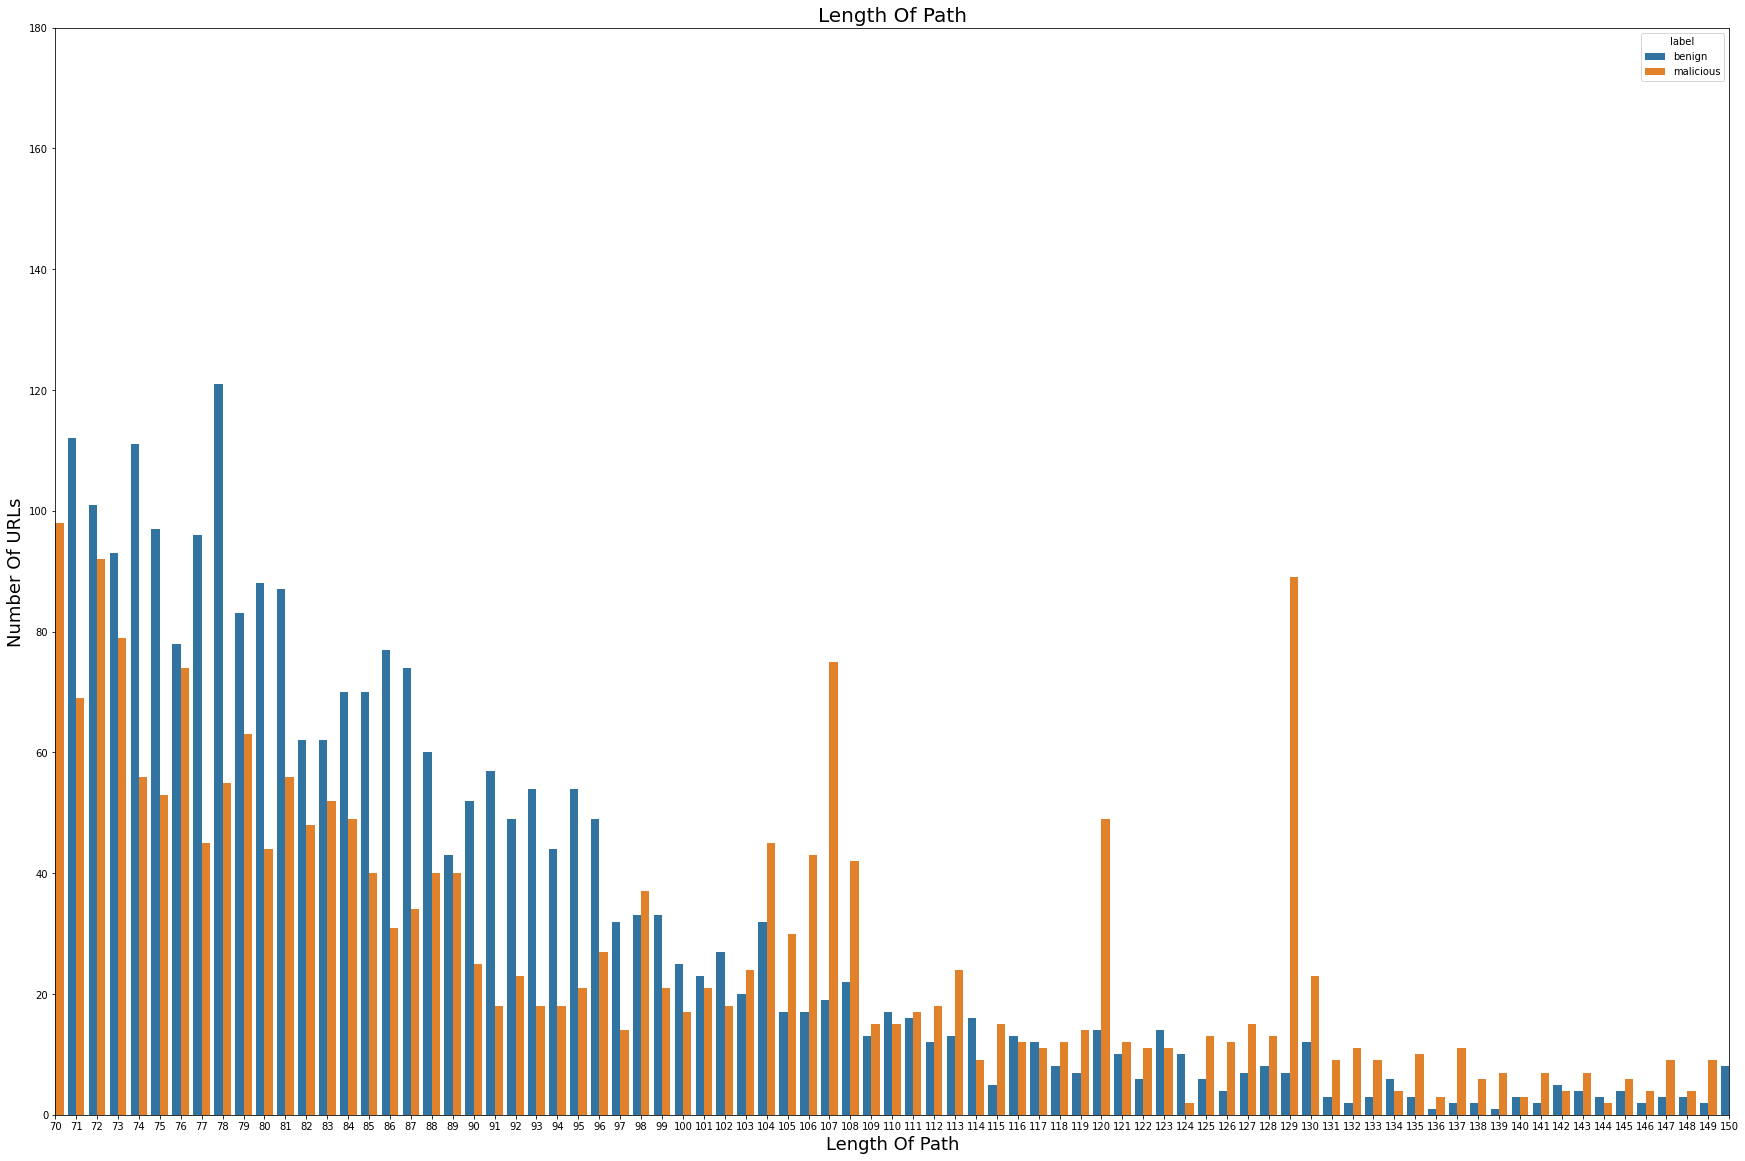

In [50]:
plt.figure(figsize=(30,20))
plt.title("Length Of Path",fontsize=20)
sns.countplot(x='path_length',data=urldata,hue='label')
plt.xlabel("Length Of Path",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)
plt.xlim(70,150)
plt.ylim(0,180)

(0.0, 200.0)

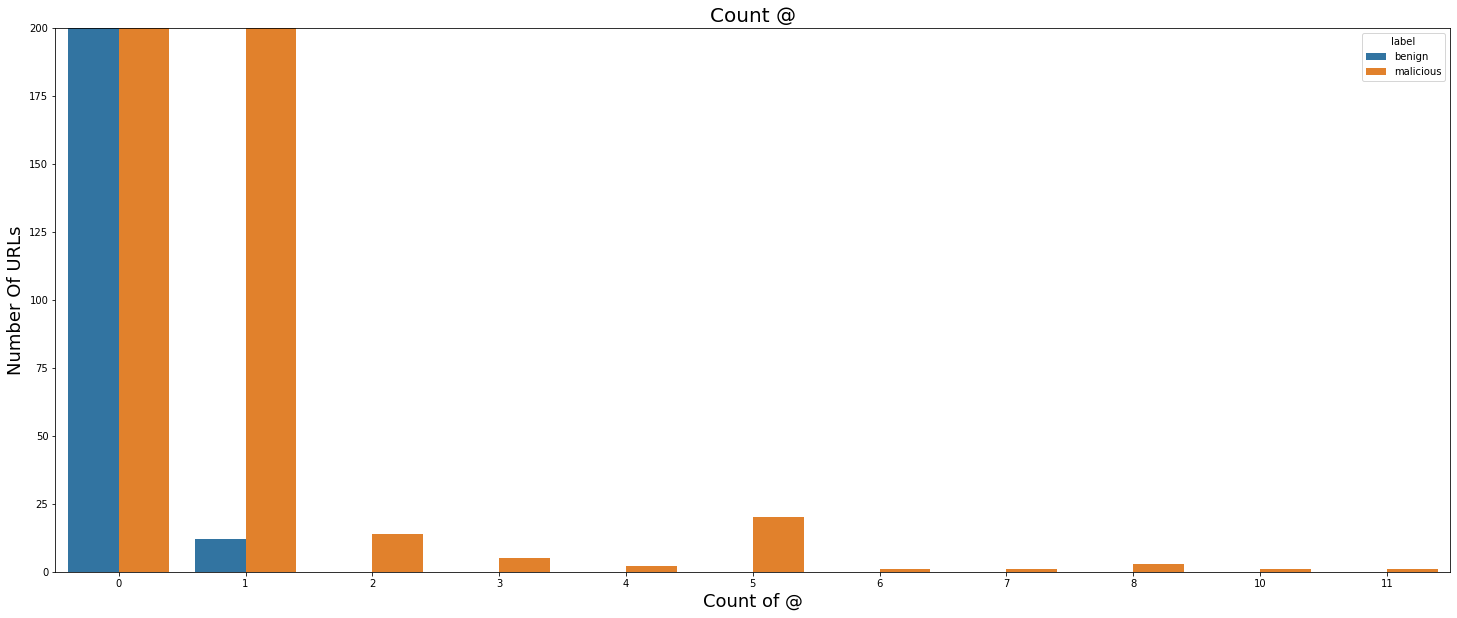

In [54]:
plt.figure(figsize=(25,10))
plt.title("Count @",fontsize=20)
sns.countplot(x='count@',data=urldata,hue='label')
plt.xlabel("Count of @",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)
plt.ylim(0,200)

(0.0, 200.0)

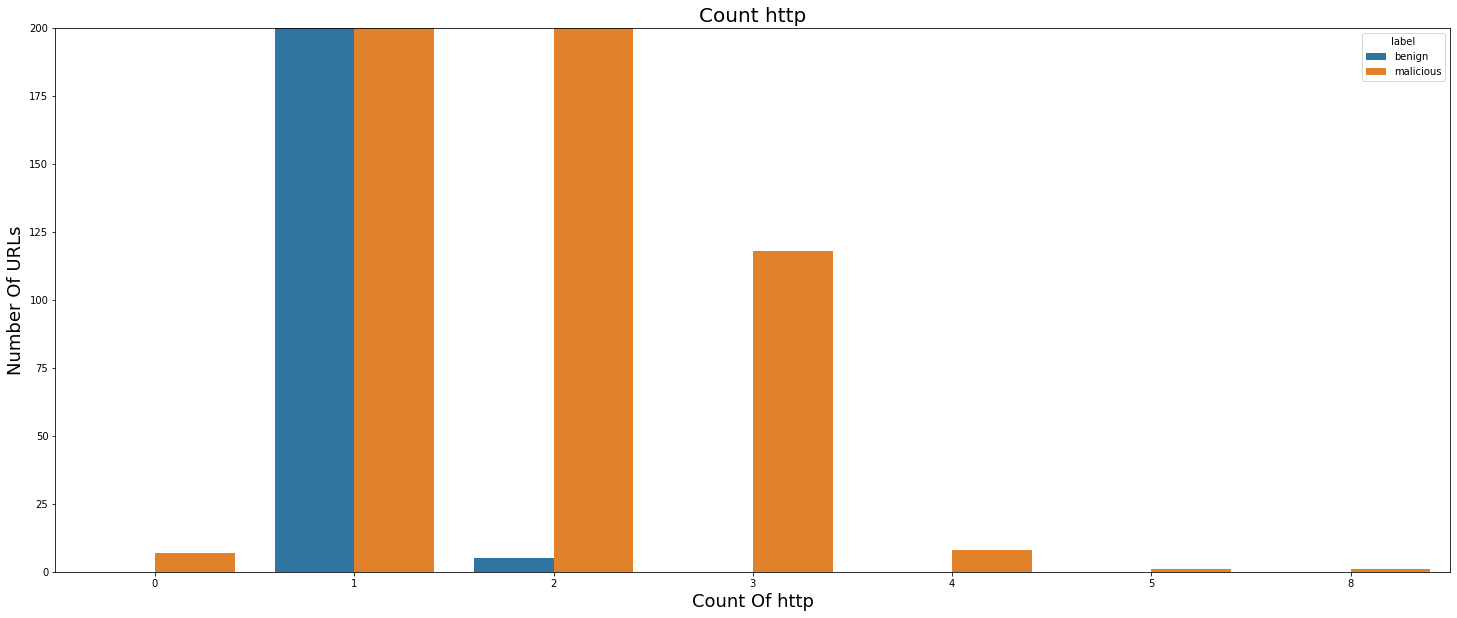

In [56]:
plt.figure(figsize=(25,10))
plt.title("Count http",fontsize=20)
sns.countplot(x='count-http',data=urldata,hue='label')
plt.xlabel("Count Of http",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)
plt.ylim(0,200)

(0.0, 200.0)

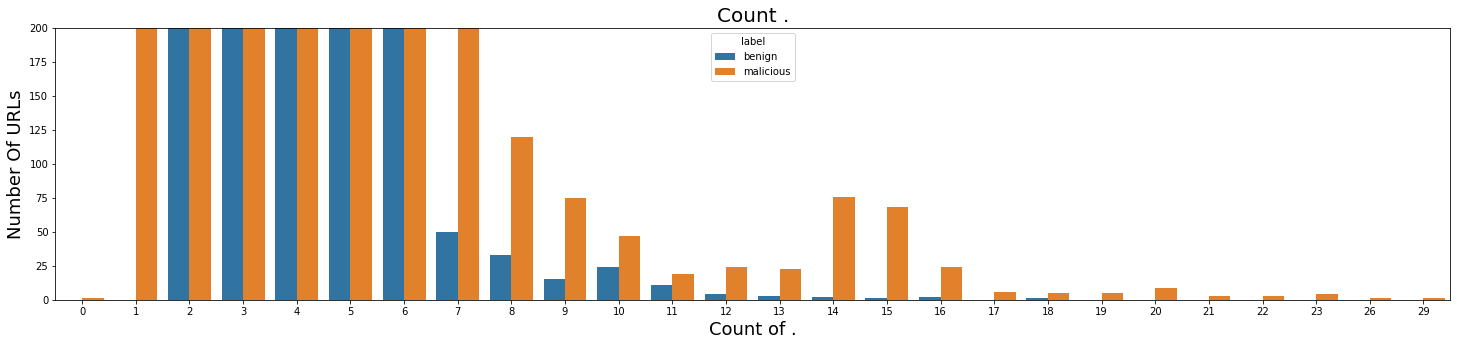

In [60]:
plt.figure(figsize=(25,5))
plt.title("Count .",fontsize=20)
sns.countplot(x='count.',data=urldata,hue='label')
plt.xlabel("Count of .",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)
plt.ylim(0,200)
# plt.xlim(0,25)

(20.0, 100.0)

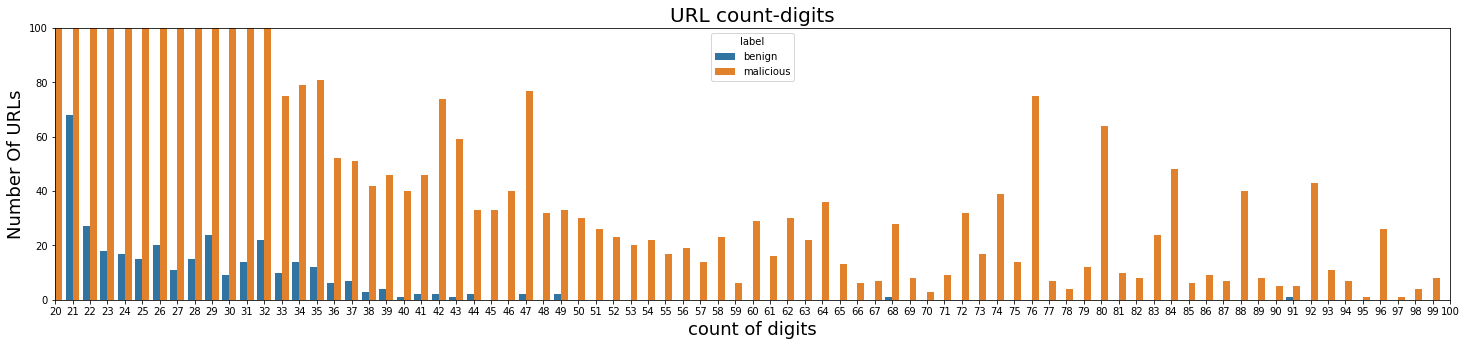

In [61]:
plt.figure(figsize=(25,5))
plt.title("URL count-digits",fontsize=20)
sns.countplot(x='count-digits',data=urldata,hue='label')
plt.xlabel("count of digits",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)
plt.ylim(0,100)
plt.xlim(20,100)

(-1.0, 25.0)

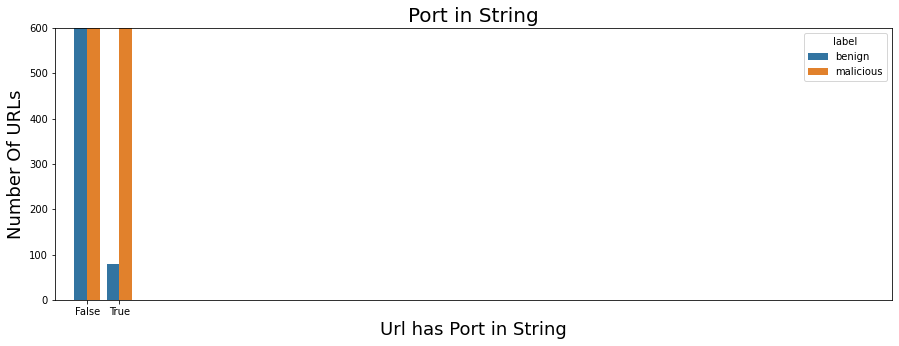

In [31]:
plt.figure(figsize=(15,5))
plt.title("Port in String",fontsize=20)
sns.countplot(x='url_has_port_in_string',data=urldata,hue='label')
plt.xlabel("Url has Port in String",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)
plt.ylim(0,600)
plt.xlim(-1,25)

(-1.0, 25.0)

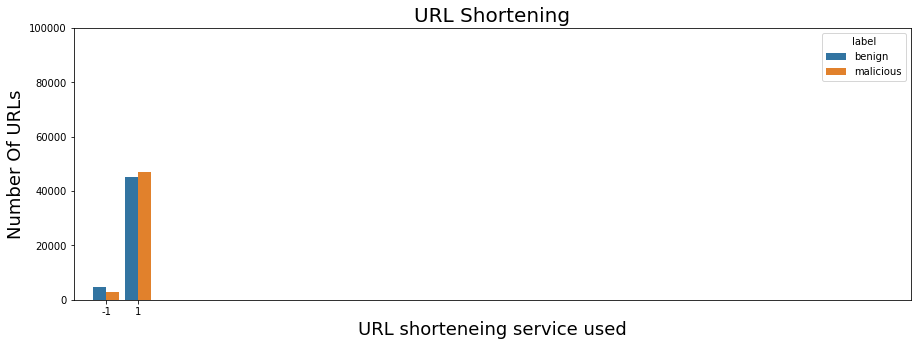

In [32]:
plt.figure(figsize=(15,5))
plt.title("URL Shortening",fontsize=20)
sns.countplot(x='short_url',data=urldata,hue='label')
plt.xlabel("URL shorteneing service used",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)
plt.ylim(0,100000)
plt.xlim(-1,25)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [34]:
x = urldata[['url_length', 'hostname_length', 'tld_length', 'path_length', 'count@', 'count.', 'count-http', 'url_has_port_in_string', 'count-digits', 'short_url']]

#Target Variable
y = urldata['result']

In [35]:
x.shape

(100176, 10)

In [36]:
y.shape

(100176,)

In [37]:
#Splitting the data into Training and Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2)

In [38]:
#Logistic Regression
log_model=LogisticRegression(max_iter=100000)
log_model.fit(x_train,y_train)

log_predictions = log_model.predict(x_test)
accuracy_score(y_test,log_predictions)

0.757552314046493

In [39]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

rfc_predictions = rfc.predict(x_test)
accuracy_score(y_test, rfc_predictions)

0.9172708101970277